In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error


In [3]:
airbnb = pd.read_csv('train.csv')

C:\Users\wanga\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
oneHot = ['host_name', 'host_location', 'host_response_time', 'host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',  'city', 'state', 'market', 'country_code', 'country', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

In [5]:
imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed = imp_frequent.fit_transform(airbnb[oneHot].to_numpy())
imputed

array([['Katarina', 'Los Angeles, California, United States',
        'within an hour', ..., 'Entire home/apt', 'Real Bed', 'flexible'],
       ['Grover', 'New York, New York, United States', 'within an hour',
        ..., 'Entire home/apt', 'Real Bed', 'moderate'],
       ['Zander', 'New York, New York, United States',
        'within a few hours', ..., 'Entire home/apt', 'Real Bed',
        'moderate'],
       ...,
       ['Juan Jose', 'New York, New York, United States',
        'within an hour', ..., 'Private room', 'Real Bed', 'flexible'],
       ['Polly', 'New York, New York, United States',
        'within a few hours', ..., 'Private room', 'Real Bed',
        'moderate'],
       ['Nathan', 'New York, New York, United States', 'within an hour',
        ..., 'Entire home/apt', 'Real Bed',
        'strict_14_with_grace_period']], dtype=object)

In [6]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(imputed)
transformed_train_np = ohe.transform(airbnb[oneHot])
transformed_train_np[0]

<1x11272 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [7]:
ser = airbnb['host_response_rate'].fillna('-1%').apply(lambda x: int(x.strip('%')))
ser.mean()

47.524330610054264

In [8]:
binary_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [9]:
airbnb[binary_columns].isna().sum()

host_is_superhost                   5
host_has_profile_pic                5
host_identity_verified              5
instant_bookable                    0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

In [10]:
for elem in binary_columns:
    print(airbnb[elem].apply(lambda x: 1 if (x == 't') else 0))

0        0
1        0
2        0
3        0
4        1
        ..
33533    0
33534    0
33535    0
33536    0
33537    0
Name: host_is_superhost, Length: 33538, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
33533    1
33534    1
33535    1
33536    1
33537    1
Name: host_has_profile_pic, Length: 33538, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
33533    1
33534    1
33535    1
33536    1
33537    1
Name: host_identity_verified, Length: 33538, dtype: int64
0        1
1        1
2        0
3        0
4        0
        ..
33533    0
33534    0
33535    0
33536    0
33537    1
Name: instant_bookable, Length: 33538, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
33533    0
33534    0
33535    0
33536    0
33537    0
Name: require_guest_profile_picture, Length: 33538, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
33533    0
33534    0
33535    0
33536    0
3

In [11]:
numerical_columns = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']

In [12]:

# for col_name in numerical_columns:
#     airbnb[col_name].fillna(value=airbnb[col_name].mean(), inplace=True)
#     print(airbnb[col_name].isna().mean())
airbnb['minimum_nights'].apply(lambda x: np.log(x + 1)).isna().mean()

0.0

In [15]:
oneHot_col = airbnb[oneHot]
oneHot_col.to_numpy()

array([['Katarina', 'Los Angeles, California, United States', nan, ...,
        'Entire home/apt', 'Real Bed', 'flexible'],
       ['Grover', 'New York, New York, United States', 'within an hour',
        ..., 'Entire home/apt', 'Real Bed', 'moderate'],
       ['Zander', 'New York, New York, United States',
        'within a few hours', ..., 'Entire home/apt', 'Real Bed',
        'moderate'],
       ...,
       ['Juan Jose', 'New York, New York, United States', nan, ...,
        'Private room', 'Real Bed', 'flexible'],
       ['Polly', 'New York, New York, United States',
        'within a few hours', ..., 'Private room', 'Real Bed',
        'moderate'],
       ['Nathan', 'New York, New York, United States', 'within an hour',
        ..., 'Entire home/apt', 'Real Bed',
        'strict_14_with_grace_period']], dtype=object)

In [22]:
train_df = airbnb
imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed = imp_frequent.fit_transform(oneHot_col.to_numpy())

ohe = OneHotEncoder(handle_unknown = 'ignore')
transformed_train_np = ohe.fit_transform(imputed)
transformed_train_np

<33538x11272 sparse matrix of type '<class 'numpy.float64'>'
	with 503070 stored elements in Compressed Sparse Row format>

In [31]:
pd.DataFrame(transformed_train_np.todense(), index=airbnb.index).merge(airbnb, left_index = True, right_index = True)

,0,1,2,3,4,5,6,7,8,9,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,8.0,f,f,strict_14_with_grace_period,f,f,1,0.44
33534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,1,2.28
33535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
33536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,f,f,moderate,f,f,3,0.10


In [29]:
import scipy.sparse
pd.DataFrame.sparse.from_spmatrix(transformed_train_np)

,0,1,2,3,4,5,6,7,8,9,...,11262,11263,11264,11265,11266,11267,11268,11269,11270,11271
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## EDA

In [ ]:
# Explore nans
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13447 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18670 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

In [ ]:
for col in ab.columns:
    print('col_name:' + col)
    print(ab[col].head(10))

col_name:id
0    22267382
1     2473861
2    25079703
3     9342478
4     4866426
5    19115443
6    12132427
7    27551517
8    27016367
9    14028380
Name: id, dtype: int64
col_name:name
0             Modern and Cozy Large Studio in Brooklyn
1                     Royal Harlem TRIPLEX Home 5 Beds
2                            Sunny East Village Studio
3                   Beautiful, airy, light-filled room
4                  Private Room in Prime Brooklyn Spot
5    26th FLOOR-RIVER VIEWS& MASSIVE SPACE-SUTTON P...
6                       Spacious 1 BR in East Village!
7    Large sunny 1 ROOM in UES, Huge roof balcony &...
8       2 Floor duplex Event space for private party's
9                    Spacious 2 Floor 1 Bed Apartment!
Name: name, dtype: object
col_name:summary
0    Modern large studio with new amenities and app...
1    Harlem is back and so gorgeous! Visit and expl...
2    Clean, hip and well designed sun drenched East...
3    Private, spacious, comfortable room in 2-bed f..

Text(0, 0.5, 'price')

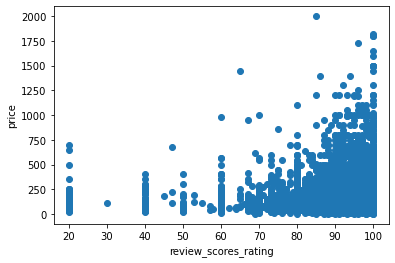

In [ ]:
plt.scatter(ab['review_scores_rating'], ab['price'])
plt.xlabel('review_scores_rating')
plt.ylabel('price')

(0.0, 1125.0)

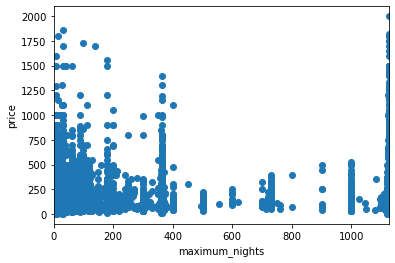

In [ ]:
plt.scatter(ab['maximum_nights'], ab['price'])
plt.xlabel('maximum_nights')
plt.ylabel('price')
plt.xlim(0, 1125)

Text(0, 0.5, 'price')

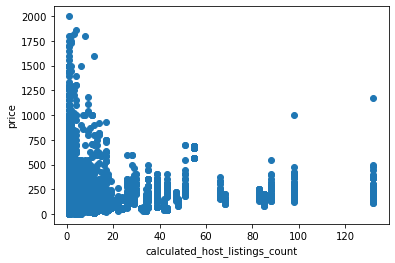

In [ ]:
plt.scatter(ab['calculated_host_listings_count'], ab['price'])
plt.xlabel('calculated_host_listings_count')
plt.ylabel('price')

Text(0, 0.5, 'price')

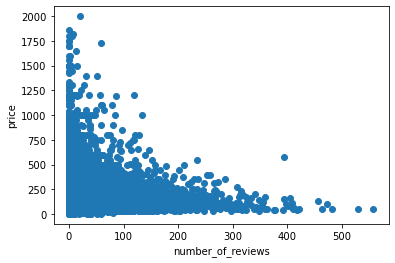

In [ ]:
plt.scatter(ab['number_of_reviews'], ab['price'])
plt.xlabel('number_of_reviews')
plt.ylabel('price')

Text(0, 0.5, 'price')

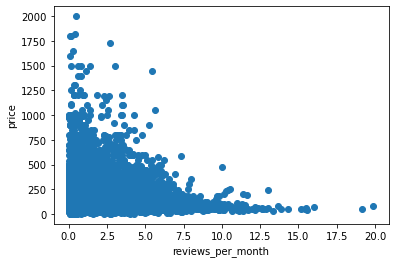

In [ ]:
plt.scatter(ab['reviews_per_month'], ab['price'])
plt.xlabel('reviews_per_month')
plt.ylabel('price')

 ## Make a linear model based on number_of_reviews, review_scores_rating, and reviews_per_month, fillna with means

In [ ]:
ab['review_scores_rating'].fillna(ab['review_scores_rating'].mean())

0        100.000000
1         91.000000
2        100.000000
3         93.751488
4         97.000000
            ...    
33533     87.000000
33534     95.000000
33535     93.751488
33536    100.000000
33537     95.000000
Name: review_scores_rating, Length: 33538, dtype: float64

In [ ]:
ab['reviews_per_month'].fillna(ab['reviews_per_month'].mean())

0        0.590000
1        2.470000
2        0.890000
3        1.429904
4        3.140000
           ...   
33533    0.440000
33534    2.280000
33535    1.429904
33536    0.100000
33537    2.760000
Name: reviews_per_month, Length: 33538, dtype: float64

In [ ]:
test = pd.DataFrame()
test['number_of_reviews'] = ab['number_of_reviews']
test['review_scores_rating'] = ab['review_scores_rating'].fillna(ab['review_scores_rating'].mean())
test['reviews_per_month'] = ab['reviews_per_month'].fillna(ab['reviews_per_month'].mean())
test['price'] = ab['price']

X_train, X_test, y_train, y_test = train_test_split(test.drop(columns = ['price']), test['price'], test_size=0.3, random_state=42)

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted = lin_reg.predict(X_test)

## Try decision tree regressor with 6 features

In [ ]:
# Define helper functions
def neigh_helper(neigh):
    if neigh == 'Manhattan':
        return 5
    if neigh == 'Brooklyn':
        return 4
    if neigh == 'Queens':
        return 3
    if neigh == 'Staten Island':
        return 2
    if neigh == 'Bronx':
        return 1

def room_helper(room_type):
    if room_type == 'Entire home/apt':
        return 3
    if room_type == 'Private room':
        return 2
    if room_type == 'Shared room':
        return 1

In [ ]:
# Get all the columns needed and pre-process them
ab_decisiontree = ab[['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'extra_people', 'number_of_reviews', 'price']]
ab_decisiontree['neighbourhood_processed'] = ab_decisiontree['neighbourhood_group_cleansed'].apply(neigh_helper)
ab_decisiontree['room_processed'] = ab_decisiontree['room_type'].apply(room_helper)
ab_decisiontree['extra_people'] = ab_decisiontree['extra_people'].apply(lambda x: float(x.strip('$')))
ab_decisiontree['property_type'] = ab['property_type']
ab_decisiontree = ab_decisiontree.drop(columns = ['neighbourhood_group_cleansed', 'room_type'])
print(pd.unique(ab_decisiontree['property_type']))
print(ab_decisiontree['property_type'].isnull().sum())
ab_decisiontree

['Loft' 'House' 'Apartment' 'Guesthouse' 'Townhouse' 'Bungalow'
 'Boutique hotel' 'Serviced apartment' 'Condominium' 'Bed and breakfast'
 'Other' 'Cabin' 'Guest suite' 'Hostel' 'Resort' 'Hotel' 'Villa'
 'Aparthotel' 'Camper/RV' 'Houseboat' 'Tiny house' 'Timeshare' 'Boat'
 'Island' 'Train' 'Cottage' 'Casa particular (Cuba)' 'Chalet' 'Tent']
0


/tmp/ipykernel_116/1326103978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_decisiontree['neighbourhood_processed'] = ab_decisiontree['neighbourhood_group_cleansed'].apply(neigh_helper)
/tmp/ipykernel_116/1326103978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_decisiontree['room_processed'] = ab_decisiontree['room_type'].apply(room_helper)
/tmp/ipykernel_116/1326103978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed
0,Loft,2,30.0,6,145.0,4,3
1,House,8,19.0,137,175.0,5,3
2,Apartment,2,0.0,3,180.0,5,3
3,Apartment,1,0.0,0,42.0,4,2
4,Apartment,2,14.0,144,80.0,4,2
...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2
33534,Serviced apartment,8,0.0,86,1195.0,5,3
33535,House,1,0.0,0,50.0,3,2
33536,Apartment,2,0.0,1,60.0,5,2


In [ ]:
# Pipeline, and build model with Decision Tree Regressor, OneHotEncode the property_type
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), ['property_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('DTR', DecisionTreeRegressor())])

# Look at the RMSE of one try
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(ab_decisiontree.drop(columns = ['price']), 
                                                        ab_decisiontree['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

113.18072511282053
115.0869207648449
121.24975803865902
120.78371857735274
120.49548209105124


In [35]:
X_train, X_test, y_train, y_test = train_test_split(airbnb.drop(columns = ['price']), 
                                                        airbnb[['price']], test_size=0.25)

In [39]:
a, b = (1 ,2)
a


1

## Try Random Forest with 6 above features, result better than decision tree

In [ ]:
# Try Random Forest, depth = 8 is optimal, 6 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), ['property_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 8))])

# Look at the RMSE of one try
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(ab_decisiontree.drop(columns = ['price']), 
                                                        ab_decisiontree['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

97.85996320804783
99.78692249999965
100.82124810210469
105.37981929673992
103.07076225242383


## Try adding "neighbourhood_cleansed" as the 7th feature for random forest

In [ ]:
testing = ab_decisiontree.copy()
testing['neighbourhood_cleansed'] = ab['neighbourhood_cleansed']
testing

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,neighbourhood_cleansed
0,Loft,2,30.0,6,145.0,4,3,Fort Greene
1,House,8,19.0,137,175.0,5,3,Harlem
2,Apartment,2,0.0,3,180.0,5,3,East Village
3,Apartment,1,0.0,0,42.0,4,2,Williamsburg
4,Apartment,2,14.0,144,80.0,4,2,Boerum Hill
...,...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2,East Village
33534,Serviced apartment,8,0.0,86,1195.0,5,3,Theater District
33535,House,1,0.0,0,50.0,3,2,Woodside
33536,Apartment,2,0.0,1,60.0,5,2,Washington Heights


In [ ]:
# Try Random Forest, depth = 8 is optimal, 7 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 8))])

# Look at the RMSE of one try
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

94.4988802415792
98.93294068332911
100.99202750760044
100.83248542742069
108.7308358953108


## Try adding "review_scores_rating" as the 8th feature for random forest, fillna with -1

In [ ]:
testing['review_scores_rating'] = ab['review_scores_rating']
testing['review_scores_rating'] = testing['review_scores_rating'].fillna(-1)

In [ ]:
# Try Random Forest, depth = 8 is optimal, 8 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 8))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

96.22974340225907
98.64518409339175
92.45614231460439
101.62375169749112
99.75503687341383
89.18188786875913
99.19823570181012
96.2873242136585
95.74524628483887
97.26211637040109


## Try linear model with only 6 above numerical features

In [ ]:
# Try linear regression, no property_type feature

lin_testing = testing.copy()
lin_testing = lin_testing.drop(columns = ['property_type', 'neighbourhood_cleansed'])
regr = linear_model.LinearRegression()
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(lin_testing.drop(columns = ['price']), 
                                                            lin_testing['price'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

100.42002608374743
105.92580454527852
110.73821014345201
106.2766309732291
104.65371986503065
104.90621331671267
110.05566599910306
106.11332379475179
112.55983125571363
100.4135759194926


## Try adding "bedrooms" as the 9th feature for random forest, fillna with -1

In [ ]:
testing['bedrooms'] = ab['bedrooms'].fillna(-1)
testing

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,neighbourhood_cleansed,review_scores_rating,bedrooms
0,Loft,2,30.0,6,145.0,4,3,Fort Greene,100.0,1.0
1,House,8,19.0,137,175.0,5,3,Harlem,91.0,3.0
2,Apartment,2,0.0,3,180.0,5,3,East Village,100.0,0.0
3,Apartment,1,0.0,0,42.0,4,2,Williamsburg,-1.0,1.0
4,Apartment,2,14.0,144,80.0,4,2,Boerum Hill,97.0,1.0
...,...,...,...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2,East Village,87.0,1.0
33534,Serviced apartment,8,0.0,86,1195.0,5,3,Theater District,95.0,4.0
33535,House,1,0.0,0,50.0,3,2,Woodside,-1.0,1.0
33536,Apartment,2,0.0,1,60.0,5,2,Washington Heights,100.0,1.0


In [ ]:
# Try Random Forest, depth = 8 is optimal, 9 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 8))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

95.64684292619157
99.63566213520915
99.80514304485956
90.33041768065256
99.59310636289064
95.68086751030364
99.12086769695445
99.40837964782656
91.99115709970286
90.80565742164366


### Modify model, change max_depth to 10

In [ ]:
# Try Random Forest, depth = 10, 9 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

91.54897727673419
99.81471586199615
94.4706751935785
99.03583750306088
89.68370108334251
96.55088506245916
95.45259816627255
91.85336007772563
100.58449772801214
95.48623415924206


## Try adding "bed_type" as the 10th feature for random forest, no NAN, need OneHot

In [ ]:
print(pd.unique(ab['bed_type']))
print((ab['bed_type']).isna().sum())

['Real Bed' 'Futon' 'Airbed' 'Pull-out Sofa' 'Couch']
0


In [ ]:
testing['bed_type'] = ab['bed_type']

In [ ]:

# Try Random Forest, depth = 10, 10 features, better than depth = 8, BEST so far, tried changing max_samples, did not help
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

93.78541888020114
89.56553750431604
97.67807394426954
102.20503693619624
95.35497924887203
97.0467262299301
102.18718113395602
88.491465544844
96.46795222519513
97.25605440290275


In [ ]:
testing

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,neighbourhood_cleansed,review_scores_rating,bedrooms,bed_type
0,Loft,2,30.0,6,145.0,4,3,Fort Greene,100.0,1.0,Real Bed
1,House,8,19.0,137,175.0,5,3,Harlem,91.0,3.0,Real Bed
2,Apartment,2,0.0,3,180.0,5,3,East Village,100.0,0.0,Real Bed
3,Apartment,1,0.0,0,42.0,4,2,Williamsburg,-1.0,1.0,Real Bed
4,Apartment,2,14.0,144,80.0,4,2,Boerum Hill,97.0,1.0,Real Bed
...,...,...,...,...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2,East Village,87.0,1.0,Real Bed
33534,Serviced apartment,8,0.0,86,1195.0,5,3,Theater District,95.0,4.0,Real Bed
33535,House,1,0.0,0,50.0,3,2,Woodside,-1.0,1.0,Real Bed
33536,Apartment,2,0.0,1,60.0,5,2,Washington Heights,100.0,1.0,Real Bed


In [ ]:
ab.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'country_code', 'country',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_s

In [ ]:
ab['reviews_per_month']

0        0.59
1        2.47
2        0.89
3         NaN
4        3.14
         ... 
33533    0.44
33534    2.28
33535     NaN
33536    0.10
33537    2.76
Name: reviews_per_month, Length: 33538, dtype: float64

In [ ]:
pd.unique(ab['cancellation_policy'])

array(['flexible', 'moderate', 'super_strict_60',
       'strict_14_with_grace_period', 'super_strict_30', 'long_term',
       'strict'], dtype=object)

In [ ]:
ab['reviews_per_month']

0        0.59
1        2.47
2        0.89
3         NaN
4        3.14
         ... 
33533    0.44
33534    2.28
33535     NaN
33536    0.10
33537    2.76
Name: reviews_per_month, Length: 33538, dtype: float64

### Third try submission

In [ ]:
# Process data
test = pd.read_csv('test.csv')
test_small = test[['id','property_type', 'accommodates', 'extra_people', 'number_of_reviews', 
                   'neighbourhood_group_cleansed','room_type', 'neighbourhood_cleansed', 'review_scores_rating', 'bedrooms', 'bed_type']]
test_small['neighbourhood_group_cleansed'] = test_small['neighbourhood_group_cleansed'].apply(neigh_helper)
test_small['room_type'] = test_small['room_type'].apply(room_helper)
test_small['extra_people'] = test_small['extra_people'].apply(lambda x: float(x.strip('$')))
test_small['review_scores_rating'] = test_small['review_scores_rating'].fillna(-1)
test_small['bedrooms'] = test_small['bedrooms'].fillna(-1)


test_small = test_small.rename(columns={"neighbourhood_group_cleansed": "neighbourhood_processed", "room_type": "room_processed"})

# Predict
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

pl.fit(testing.drop(columns = ['price']), testing['price'])
predicted = pl.predict(test_small.drop(columns = ['id']))
predicted
result3 = pd.DataFrame()
result3['Id'] = test_small['id']
result3['Predicted'] = predicted
result3.to_csv('my_test3.csv', index = False)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_99/3139234353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_small['neighbourhood_group_cleansed'] = test_small['neighbourhood_group_cleansed'].apply(neigh_helper)
/tmp/ipykernel_99/3139234353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_small['

array([308.86533649, 131.6175366 ,  68.65146829, ...,  69.98896759,
        65.86942489, 112.48580149])

----

In [ ]:
print(testing.where(testing['bed_type'] == 'Real Bed')['price'].mean())
print(testing.where(testing['bed_type'] == 'Futon')['price'].mean())
print(testing.where(testing['bed_type'] == 'Airbed')['price'].mean())
print(testing.where(testing['bed_type'] == 'Pull-out Sofa')['price'].mean())
print(testing.where(testing['bed_type'] == 'Couch')['price'].mean())
# Real bed > Airbed > Couch > Pull-out Sofa > Futon

145.9686085027502
94.62151394422311
126.08461538461539
98.25906735751295
113.36842105263158


In [ ]:
print(testing.where(testing['bed_type'] == 'Real Bed')['price'].median())
print(testing.where(testing['bed_type'] == 'Futon')['price'].median())
print(testing.where(testing['bed_type'] == 'Airbed')['price'].median())
print(testing.where(testing['bed_type'] == 'Pull-out Sofa')['price'].median())
print(testing.where(testing['bed_type'] == 'Couch')['price'].median())
# Real bed > Airbed = Pull-out Sofa > Futon > Couch

110.0
75.0
85.0
85.0
65.0


## Try using customer function for bed_type, not OneHot

In [ ]:
def bed_type_mean_helper(bed_type):
    if bed_type == 'Real Bed':
        return 5
    if bed_type == 'Airbed':
        return 4
    if bed_type == 'Couch':
        return 3
    if bed_type == 'Pull-out Sofa':
        return 2
    if bed_type == 'Futon':
        return 1

def bed_type_median_helper(bed_type):
    if bed_type == 'Real Bed':
        return 5
    if bed_type == 'Airbed':
        return 4
    if bed_type == 'Pull-out Sofa':
        return 4
    if bed_type == 'Futon':
        return 3
    if bed_type == 'Couch':
        return 2

### Use the mean order

In [ ]:
testing['bed_type'] = ab['bed_type'].apply(bed_type_mean_helper)

# Try Random Forest, depth = 10, 10 features, better than depth = 8, BEST so far, tried changing max_samples, did not help
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

95.93421441565326
96.8576124908392
89.85795474593053
91.21169931739723
92.57604983133965
98.1315341621458
91.84758825726135
95.02495130160398
100.79153848473808
91.59471744805491


In [ ]:
testing['bed_type'] = ab['bed_type'].apply(bed_type_mean_helper)

test_small2 = test_small.copy()
test_small2['bed_type'] = test_small2['bed_type'].apply(bed_type_mean_helper)

preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

pl.fit(testing.drop(columns = ['price']), testing['price'])
predicted = pl.predict(test_small2.drop(columns = ['id']))
predicted


array([304.85505763, 133.17126955,  67.97009986, ...,  72.4208997 ,
        65.58014758, 115.70838448])

In [ ]:
result3 = pd.DataFrame()
result3['Id'] = test_small['id']
result3['Predicted'] = predicted
result3.to_csv('my_test4.csv', index = False)

### Use the median order

In [ ]:
testing['bed_type'] = ab['bed_type'].apply(bed_type_median_helper)

# Try Random Forest, depth = 10, 10 features, better than depth = 8, BEST so far, tried changing max_samples, did not help
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

90.54537455438799
98.068844361023
96.27721830883522
93.33984210411808
94.1513791737039
98.80325001282493
100.5266447002489
92.08515702635371
91.33995210328831
90.70549168592679


## Try add "reviews_per_month" as the 11th feature, random forest

In [ ]:
testing['reviews_per_month'] = ab['reviews_per_month'].fillna(0)
testing

# Try Random Forest, depth = 10, 11 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

88.22431268355966
95.65753198894244
101.22269066154652
89.8998713997716
96.71899892770698
94.26745941210673
97.35259117497648
96.32881711762342
87.06116333837586
92.97202878755333


## Try adding "guests_included" as the 11th feature for random forest, no Nan (not working)

In [ ]:
testing['bed_type'] = ab['bed_type']
testing['guests_included'] = ab['guests_included']
# Try Random Forest, depth = 10, 10 features
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 10))])

# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

99.85120320312153
93.49491562536845
97.80801484669507
92.69396541258058
93.54906074441229
92.61579814608919
97.38658929294284
100.62291801815759
100.20646818997794
96.75112102236474


## Try SVM regressor with the 10 features

In [ ]:
# Bed_type mean_processed

preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('SVR', SVR(C = 0.5))])

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

## Try average of linear and random_forest so far

In [ ]:
# Try linear regression, no property_type feature

ab_linear = ab_decisiontree.drop(columns = ['property_type'])
regr = linear_model.LinearRegression()
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(ab_linear.drop(columns = ['price']), 
                                                            ab_linear['price'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

102.29969005962883
106.79668544576123
105.66393677914407
102.02978955717408
108.19749705590658
104.90840921810175
112.1714318288883
101.59461208151004
105.23478155225631
112.47859830173446


In [ ]:
ab['beds'].isna().sum()

31

In [ ]:
ab_linear = ab_decisiontree.drop(columns = ['property_type'])
ab_linear['beds'] = ab['beds'].fillna(-1)

In [ ]:
# Try linear regression, with number of beds

ab_linear = ab_decisiontree.drop(columns = ['property_type'])
ab_linear['beds'] = ab['beds'].fillna(-1)
regr = linear_model.LinearRegression()
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(ab_linear.drop(columns = ['price']), 
                                                            ab_linear['price'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

109.41177617487868
108.71863410578185
102.84282165204593
109.00316298994147
100.89597742281894
111.45825066041438
103.44934197226685
103.80782772528327
107.78682892591158
106.51953120960846


In [ ]:
# Try to predict the given dataset
test = pd.read_csv('test.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ab_decisiontree

,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,property_type
0,2,30.0,6,145.0,4,3,Loft
1,8,19.0,137,175.0,5,3,House
2,2,0.0,3,180.0,5,3,Apartment
3,1,0.0,0,42.0,4,2,Apartment
4,2,14.0,144,80.0,4,2,Apartment
...,...,...,...,...,...,...,...
33533,2,25.0,19,110.0,5,2,Apartment
33534,8,0.0,86,1195.0,5,3,Serviced apartment
33535,1,0.0,0,50.0,3,2,House
33536,2,0.0,1,60.0,5,2,Apartment


In [ ]:
test_s = test[['id', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'extra_people', 'number_of_reviews', 'property_type']]

In [ ]:
test_s['neighbourhood_group_cleansed'] = test['neighbourhood_group_cleansed'].apply(neigh_helper)

/tmp/ipykernel_99/3032758686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_s['neighbourhood_group_cleansed'] = test['neighbourhood_group_cleansed'].apply(neigh_helper)


In [ ]:
test_s['room_type'] = test_s['room_type'].apply(room_helper)

/tmp/ipykernel_99/671007183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_s['room_type'] = test_s['room_type'].apply(room_helper)


In [ ]:
test_s['extra_people'] = test_s['extra_people'].apply(lambda x: float(x.strip('$')))

/tmp/ipykernel_99/2900840929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_s['extra_people'] = test_s['extra_people'].apply(lambda x: float(x.strip('$')))


In [ ]:
test_s = test_s.rename(columns={"room_type": "room_processed", "neighbourhood_group_cleansed": "neighbourhood_processed"})

In [ ]:
test_s

,id,neighbourhood_processed,room_processed,accommodates,extra_people,number_of_reviews,property_type
0,19307997,5,3,4,0.0,0,Condominium
1,20176193,4,3,2,0.0,22,Apartment
2,19485371,5,2,1,20.0,6,Apartment
3,13079990,4,2,2,0.0,7,Apartment
4,22339757,4,2,3,10.0,14,Apartment
...,...,...,...,...,...,...,...
17332,22325617,4,2,1,0.0,0,Apartment
17333,8372650,5,3,3,50.0,0,Apartment
17334,3812554,3,2,2,0.0,67,House
17335,18891508,4,2,2,15.0,4,Apartment


In [ ]:
# Try Random Forest, depth = 8 is optimal, DELETE!
testing['neighbourhood_cleansed'] = ab['neighbourhood_cleansed']
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 8))])

# Look at the RMSE of one try
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    print(rmse)

In [ ]:
test_df = pd.DataFrame()
test_df['id'] = test_s['id']
test_df['accommodates'] = test_s['accommodates']
test_df['extra_people'] = test_s['extra_people']
test_df['number_of_reviews'] = test_s['number_of_reviews']
test_df['neighbourhood_processed'] = test_s['neighbourhood_processed']
test_df['room_processed'] = test_s['room_processed']
test_df['property_type'] = test_s['property_type']
test_df['neighbourhood_cleansed'] = test['neighbourhood_cleansed']
test_df

,id,accommodates,extra_people,number_of_reviews,neighbourhood_processed,room_processed,property_type,neighbourhood_cleansed
0,19307997,4,0.0,0,5,3,Condominium,Battery Park City
1,20176193,2,0.0,22,4,3,Apartment,Bedford-Stuyvesant
2,19485371,1,20.0,6,5,2,Apartment,Harlem
3,13079990,2,0.0,7,4,2,Apartment,Brownsville
4,22339757,3,10.0,14,4,2,Apartment,Bushwick
...,...,...,...,...,...,...,...,...
17332,22325617,1,0.0,0,4,2,Apartment,Bedford-Stuyvesant
17333,8372650,3,50.0,0,5,3,Apartment,Midtown
17334,3812554,2,0.0,67,3,2,House,Forest Hills
17335,18891508,2,15.0,4,4,2,Apartment,East Flatbush


## Current optimal model (7 features, 2 OneHotEncoding)

In [ ]:
testing

,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,property_type,neighbourhood_cleansed
0,2,30.0,6,145.0,4,3,Loft,Fort Greene
1,8,19.0,137,175.0,5,3,House,Harlem
2,2,0.0,3,180.0,5,3,Apartment,East Village
3,1,0.0,0,42.0,4,2,Apartment,Williamsburg
4,2,14.0,144,80.0,4,2,Apartment,Boerum Hill
...,...,...,...,...,...,...,...,...
33533,2,25.0,19,110.0,5,2,Apartment,East Village
33534,8,0.0,86,1195.0,5,3,Serviced apartment,Theater District
33535,1,0.0,0,50.0,3,2,House,Woodside
33536,2,0.0,1,60.0,5,2,Apartment,Washington Heights


In [ ]:
# Use Random Forest to predict data
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('RFR', RandomForestRegressor(max_depth = 8))])


pl.fit(testing.drop(columns = ['price']), testing['price'])
predicted = pl.predict(test_df.drop(columns = ['id']))
predicted

array([347.12613025, 115.98716685,  70.47410181, ...,  70.40406913,
        66.92525721, 112.16485376])

In [ ]:
test_df['Predicted'] = predicted

In [ ]:
test_df = test_df[['id', 'Predicted']]

In [ ]:
test_df = test_df.rename(columns = {'id': 'Id'})

In [ ]:
# First try
predicted

array([295.05571299, 128.12720924,  82.26867852, ...,  69.7045434 ,
        68.22734541,  98.97432297])

In [ ]:
predicted

array([347.12613025, 115.98716685,  70.47410181, ...,  70.40406913,
        66.92525721, 112.16485376])

In [ ]:
test_df.to_csv('my_test2.csv', index = False)

## ##############################





## Try GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
testing

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,neighbourhood_cleansed,review_scores_rating,bedrooms,bed_type,reviews_per_month
0,Loft,2,30.0,6,145.0,4,3,Fort Greene,100.0,1.0,Real Bed,0.59
1,House,8,19.0,137,175.0,5,3,Harlem,91.0,3.0,Real Bed,2.47
2,Apartment,2,0.0,3,180.0,5,3,East Village,100.0,0.0,Real Bed,0.89
3,Apartment,1,0.0,0,42.0,4,2,Williamsburg,-1.0,1.0,Real Bed,0.00
4,Apartment,2,14.0,144,80.0,4,2,Boerum Hill,97.0,1.0,Real Bed,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2,East Village,87.0,1.0,Real Bed,0.44
33534,Serviced apartment,8,0.0,86,1195.0,5,3,Theater District,95.0,4.0,Real Bed,2.28
33535,House,1,0.0,0,50.0,3,2,Woodside,-1.0,1.0,Real Bed,0.00
33536,Apartment,2,0.0,1,60.0,5,2,Washington Heights,100.0,1.0,Real Bed,0.10


In [ ]:
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('GBR', GradientBoostingRegressor())])

# Look at the RMSE of one try
rmse_l = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_l.append(rmse)
print(np.mean(rmse_l))

93.8769908025173


In [ ]:
testing = testing.drop(columns = ['reviews_per_month'])

In [ ]:
testing

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,neighbourhood_cleansed,review_scores_rating,bedrooms,bed_type
0,Loft,2,30.0,6,145.0,4,3,Fort Greene,100.0,1.0,Real Bed
1,House,8,19.0,137,175.0,5,3,Harlem,91.0,3.0,Real Bed
2,Apartment,2,0.0,3,180.0,5,3,East Village,100.0,0.0,Real Bed
3,Apartment,1,0.0,0,42.0,4,2,Williamsburg,-1.0,1.0,Real Bed
4,Apartment,2,14.0,144,80.0,4,2,Boerum Hill,97.0,1.0,Real Bed
...,...,...,...,...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2,East Village,87.0,1.0,Real Bed
33534,Serviced apartment,8,0.0,86,1195.0,5,3,Theater District,95.0,4.0,Real Bed
33535,House,1,0.0,0,50.0,3,2,Woodside,-1.0,1.0,Real Bed
33536,Apartment,2,0.0,1,60.0,5,2,Washington Heights,100.0,1.0,Real Bed


In [ ]:
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('GBR', GradientBoostingRegressor())])

# Look at the RMSE of one try
rmse_l = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_l.append(rmse)
print(np.mean(rmse_l))

93.58049017397266


In [ ]:


preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('GBR', GradientBoostingRegressor(learning_rate = 0.08, n_estimators = 250, subsample = 0.8))])

# Look at the RMSE of one try
rmse_l = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_l.append(rmse)
print(np.mean(rmse_l))

92.69326613776184


In [ ]:
# 92.63732889544444
rmse_l

[93.8696492501037,
 92.24199290021447,
 93.8787112520617,
 98.03006242453985,
 87.76020893619913,
 89.96168391023383,
 96.6814559522167,
 89.81577267344305,
 97.08150787863049,
 87.61161619997536]

# Current best model (fifth submission)

In [ ]:
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('GBR', GradientBoostingRegressor(n_estimators = 300, subsample = 0.8))])

# Look at the RMSE of one try
rmse_l = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_l.append(rmse)
print(np.mean(rmse_l))

91.29875826547598


In [ ]:
rmse_l

[93.10642817401887,
 87.05779206639137,
 84.67842641300496,
 88.81732115414569,
 94.45248790063303,
 96.12113988401681,
 91.14863101523214,
 92.67152014975186,
 95.54778776881017,
 88.9601152488286]

In [ ]:
# Process data
test = pd.read_csv('test.csv')
test_small = test[['id','property_type', 'accommodates', 'extra_people', 'number_of_reviews', 
                   'neighbourhood_group_cleansed','room_type', 'neighbourhood_cleansed', 'review_scores_rating', 'bedrooms', 'bed_type']]
test_small['neighbourhood_group_cleansed'] = test_small['neighbourhood_group_cleansed'].apply(neigh_helper)
test_small['room_type'] = test_small['room_type'].apply(room_helper)
test_small['extra_people'] = test_small['extra_people'].apply(lambda x: float(x.strip('$')))
test_small['review_scores_rating'] = test_small['review_scores_rating'].fillna(-1)
test_small['bedrooms'] = test_small['bedrooms'].fillna(-1)


test_small = test_small.rename(columns={"neighbourhood_group_cleansed": "neighbourhood_processed", "room_type": "room_processed"})

# Predict
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('GBR', GradientBoostingRegressor(n_estimators = 300, subsample = 0.8))])

pl.fit(testing.drop(columns = ['price']), testing['price'])
predicted = pl.predict(test_small.drop(columns = ['id']))
predicted
result3 = pd.DataFrame()
result3['Id'] = test_small['id']
result3['Predicted'] = predicted
result3.to_csv('my_test5.csv', index = False)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_119/2184860247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_small['neighbourhood_group_cleansed'] = test_small['neighbourhood_group_cleansed'].apply(neigh_helper)
/tmp/ipykernel_119/2184860247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_small

In [ ]:
test_small

,id,property_type,accommodates,extra_people,number_of_reviews,neighbourhood_processed,room_processed,neighbourhood_cleansed,review_scores_rating,bedrooms,bed_type
0,19307997,Condominium,4,0.0,0,5,3,Battery Park City,-1.0,2.0,Real Bed
1,20176193,Apartment,2,0.0,22,4,3,Bedford-Stuyvesant,97.0,2.0,Real Bed
2,19485371,Apartment,1,20.0,6,5,2,Harlem,100.0,1.0,Real Bed
3,13079990,Apartment,2,0.0,7,4,2,Brownsville,83.0,1.0,Real Bed
4,22339757,Apartment,3,10.0,14,4,2,Bushwick,74.0,1.0,Real Bed
...,...,...,...,...,...,...,...,...,...,...,...
17332,22325617,Apartment,1,0.0,0,4,2,Bedford-Stuyvesant,-1.0,0.0,Real Bed
17333,8372650,Apartment,3,50.0,0,5,3,Midtown,-1.0,1.0,Real Bed
17334,3812554,House,2,0.0,67,3,2,Forest Hills,98.0,1.0,Real Bed
17335,18891508,Apartment,2,15.0,4,4,2,East Flatbush,95.0,1.0,Real Bed


In [ ]:
testing

,property_type,accommodates,extra_people,number_of_reviews,price,neighbourhood_processed,room_processed,neighbourhood_cleansed,review_scores_rating,bedrooms,bed_type
0,Loft,2,30.0,6,145.0,4,3,Fort Greene,100.0,1.0,Real Bed
1,House,8,19.0,137,175.0,5,3,Harlem,91.0,3.0,Real Bed
2,Apartment,2,0.0,3,180.0,5,3,East Village,100.0,0.0,Real Bed
3,Apartment,1,0.0,0,42.0,4,2,Williamsburg,-1.0,1.0,Real Bed
4,Apartment,2,14.0,144,80.0,4,2,Boerum Hill,97.0,1.0,Real Bed
...,...,...,...,...,...,...,...,...,...,...,...
33533,Apartment,2,25.0,19,110.0,5,2,East Village,87.0,1.0,Real Bed
33534,Serviced apartment,8,0.0,86,1195.0,5,3,Theater District,95.0,4.0,Real Bed
33535,House,1,0.0,0,50.0,3,2,Woodside,-1.0,1.0,Real Bed
33536,Apartment,2,0.0,1,60.0,5,2,Washington Heights,100.0,1.0,Real Bed


In [ ]:
rmse_l

[90.36464983470842,
 89.7390265815982,
 89.17480593305822,
 92.79032413646785,
 91.68197651380994,
 91.55694174911909,
 96.5801664414171,
 85.98769511068689,
 94.13199380292653,
 90.98000255096761]

In [ ]:
preproc = ColumnTransformer(transformers = [('oneHot', OneHotEncoder(handle_unknown = 'ignore'), 
                                             ['property_type', 'neighbourhood_cleansed', 'bed_type'])], 
                            remainder = 'passthrough')
pl = Pipeline([('one_hot', preproc), ('GBR', GradientBoostingRegressor(n_estimators = 350, subsample = 0.8))])

# Look at the RMSE of one try
rmse_l = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(testing.drop(columns = ['price']), 
                                                        testing['price'], test_size=0.25)
    pl.fit(X_train, y_train)
    predicted = pl.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_l.append(rmse)
print(np.mean(rmse_l))

92.79273119804024


In [ ]:
rmse_l

[94.23182366918044,
 94.16528595587617,
 88.01799280465602,
 93.65299041154572,
 88.86632129306307,
 94.21919981439518,
 94.67155309739915,
 96.23088681930645,
 94.15994209464692,
 89.71131602033336]

# #######################

## Try XGboost

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 173.6 MB 22 kB/s s eta 0:00:01     |▎                               | 1.5 MB 11.6 MB/s eta 0:00:15                      | 6.7 MB 11.6 MB/s eta 0:00:15     |█████                           | 26.7 MB 11.6 MB/s eta 0:00:13MB/s eta 0:00:02     |████████████████████▌           | 110.9 MB 42.4 MB/s eta 0:00:02     |████████████████████▉           | 113.2 MB 42.4 MB/s eta 0:00:02 42.4 MB/s eta 0:00:024 MB/s eta 0:00:02    | 121.0 MB 42.4 MB/s eta 0:00:02██████████████████████▉       | 134.6 MB 44.3 MB/s eta 0:00:01MB/s eta 0:00:01MB/s eta 0:00:01��█████████████▌    | 149.4 MB 44.3 MB/s eta 0:00:01��██████████████    | 151.3 MB 44.3 MB/s eta 0:00:01▍ | 164.6 MB 44.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb

In [ ]:
xg_testing = testing.drop(columns = ['property_type', 'neighbourhood_cleansed', 'bed_type'])

In [ ]:
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, n_estimators = 30)

In [ ]:
rmse_l = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(xg_testing.drop(columns = ['price']), 
                                                        xg_testing['price'], test_size=0.25)
    xg_reg.fit(X_train,y_train)
    predicted = xg_reg.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_l.append(rmse)
print(np.mean(rmse_l))

103.66819296651931


In [ ]:
rmse_l

[106.69439651259795,
 110.07557310931126,
 108.18486785538326,
 108.82112781823785,
 105.26236759455767,
 105.65015960875905,
 106.74270922571145,
 105.41553296212115,
 106.66678056460408,
 109.64749059280246]

Website: https://www.datacamp.com/community/tutorials/xgboost-in-python

In [ ]:
rmse_l

[106.7385815142611,
 99.06521208187216,
 101.95264326406861,
 104.09005969853426,
 100.4361401915586,
 104.3304117936044,
 102.45491578770604,
 103.49562980363537,
 106.50983431596087,
 107.60850121399164]